# **Auto analysis project**

## **1. Load and clean.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Read_data = "/content/drive/MyDrive/Auto.csv"
# read file and drop ?
Auto_data = pd.read_csv(Read_data, na_values='?').dropna()
Auto_data.info()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [ ]:
# check null value
data_nulls = pd.DataFrame(Auto_data.isnull().sum())
data_nulls.reset_index(inplace=True)
data_nulls.columns = ['Lables', 'Null values']
data_nulls

,Lables,Null values
0,mpg,0
1,cylinders,0
2,displacement,0
3,horsepower,0
4,weight,0
5,acceleration,0
6,year,0
7,origin,0
8,name,0


In [ ]:
# drop name column
Auto_data = Auto_data.drop(columns=["name"])
print(Auto_data.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin            int64
dtype: object


### **1.1**
According the data description, the variable we should **drop** is comlumn "**name**". The reason behind dropping column "name" is because "mpg", "cylinders","displacement", "horsepower", "weight", "acceleration", "year" are all related with numbers and categories, as we are doing regression, we should not drop those. "orgin" however is consider a categorical data, and from looking at the data, there could be some insights between whether the car is american, european or japanese made, hence we are keeping this. However, I does not see any analytics values in "name" so I decided to drop them.

 In addition, as I look in to the data and it contained "**?**" value so I dropped them.

In [ ]:
# changing data type
new_dtypes = {'mpg': 'int',
              'cylinders': 'category',
              'displacement' :'int',
              'horsepower':'int',
              'weight': 'int',
              'acceleration':'int',
              'year': 'int',
              'origin':'category',
              }

Auto_data = Auto_data.astype(new_dtypes)
print(Auto_data.dtypes)

mpg                int64
cylinders       category
displacement       int64
horsepower         int64
weight             int64
acceleration       int64
year               int64
origin          category
dtype: object


### **1.2**
Here is Which variables should be treated as numeric and which as categorical and why:



*   mpg (**Numeric**): as it is different from different cars and will should not be a category
*   cylinders (**Categorical**): as it catergorizes cars based on the engine type, whether it is 4 cylinders, or 6 cylinders or 8 cylinders
* displacement (**Numeric**): as it is describing engine displacement and each cars' are different
* hoursepower (**Numeric**): as it is describing the engine power and each cars' are different
* weight (**Numeric**): same as hoursepower, it is different based on different cars.
* acceleration (**Numeric**): same as weight, it is different based on different cars.
* year (**Numeric**): Year is tricky as it can be numerical or categorical, in this case, as I am planning on looking into the relationship between year and different variable
* Origin(**Categorical**): as it catergorizes cars from where they were made, there are only three origins category in this data.
* Name (**"Already dropped" string**): it is a string as it is just the name of the car


## **2. Scatter and explore.**

### **2.1**

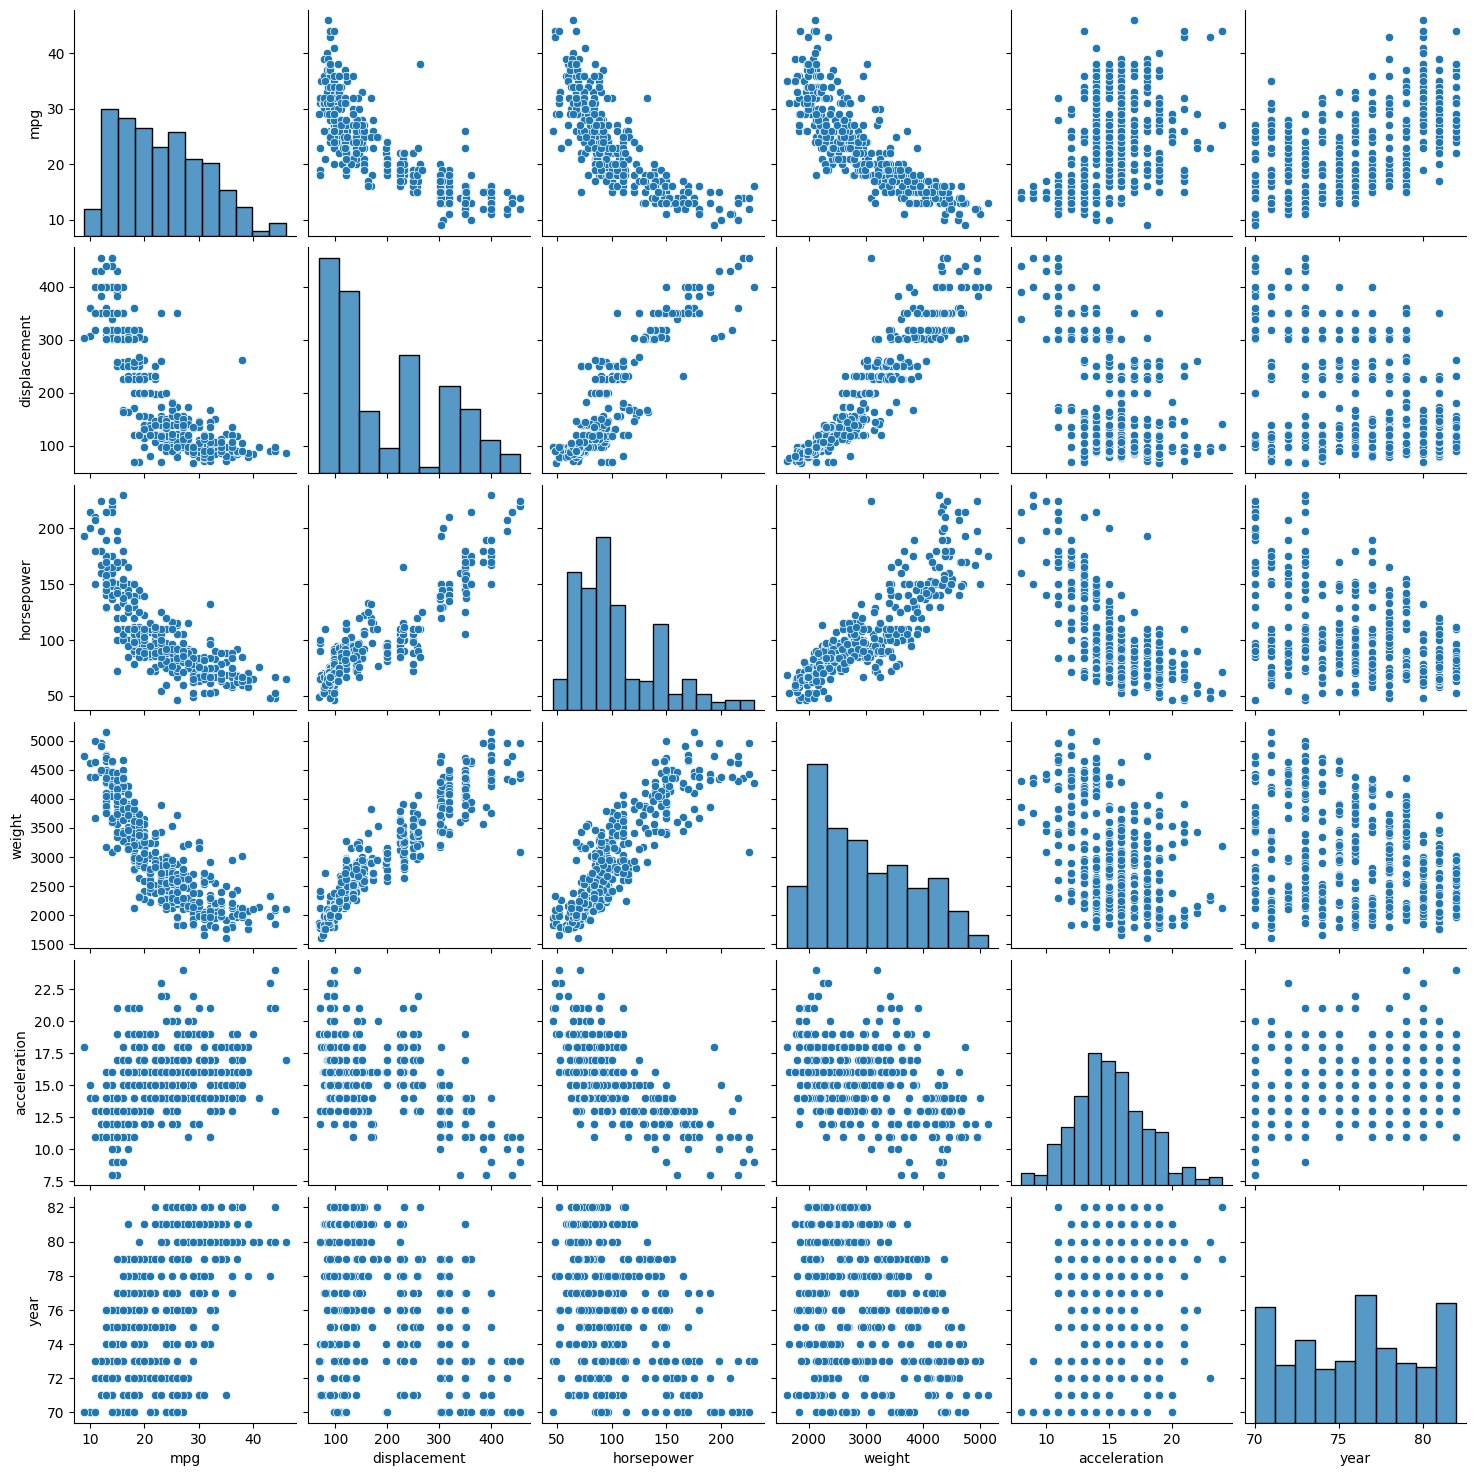

In [ ]:
sns.pairplot(Auto_data)

### **2.2**


The first interesting relationship that I notice is that there is a negatice correlation between "**mpg**" and "**weight**", according to the graph, as the weight of the car increases, the mpg decreases. This gives out a overview of the relationship between weight and cars : the heavier the car is, the leff fuel-efficiency it will have.

The second interesting relationship is that there is a positive correlation between “**weight**" and "**hoursepower**", according to the graph, as the weight increases, the hoursepower increases too, this is becasue that as the weight increase, the cars required more hoursepower in order to move

## **3. Correlation matrix among the numeric variables.**

In [ ]:
Auto_data.corr()

<ipython-input-76-b196ba0dad22>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Auto_data.corr()


,mpg,displacement,horsepower,weight,acceleration,year
mpg,1.000000,-0.806765,-0.779415,-0.835080,0.403785,0.569008
displacement,-0.806765,1.000000,0.897255,0.932996,-0.522269,-0.369838
horsepower,-0.779415,0.897255,1.000000,0.864538,-0.673877,-0.416361
weight,-0.835080,0.932996,0.864538,1.000000,-0.402713,-0.309120
acceleration,0.403785,-0.522269,-0.673877,-0.402713,1.000000,0.261773
year,0.569008,-0.369838,-0.416361,-0.309120,0.261773,1.000000


From this correlation matrix, the obvious observation is the correlation between weight and displacement, the number is 0.932996 which is almost 1. The number indicate that those two variables has a very strong relationship as the bigger the weight is, the larger the engine displacement is.

## **4. Use statsmodels to regress mpg on all other variables.**

In [ ]:
import statsmodels.formula.api as smf

est = smf.ols('mpg ~ C(cylinders) + displacement + horsepower + weight + acceleration + year + C(origin)', Auto_data).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     187.9
Date:                Wed, 01 Nov 2023   Prob (F-statistic):          3.76e-146
Time:                        03:29:52   Log-Likelihood:                -993.22
No. Observations:                 392   AIC:                             2010.
Df Residuals:                     380   BIC:                             2058.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -19.6581      4.56

**4.1**

For significant effects, if the P-value is smaller than 0.05, then it has significant effects. In this case here is a list of variables that has significant effects:


*   C(cylinders)[T.4]
*   C(cylinders)[T.5]
*   C(cylinders)[T.8]
*   C(origin)[T.2]  
*   C(origin)[T.3]
*   displacement
*   horsepower
*   weight
*   year   

**4.2**

As there are two variables that their p-value is bigger than 0.05, in this cause, only C(cylinders)[T.4] and acceleration don't have significant effects. The back reason behind why acceleration and mpg doesn't have significant effects is simple because it does not have much relationship, as mpg does not have much relationsship with how quickly can a car increase the spped. as a driver myself, I know that regualr car and a truck with similar acceleration would perform very differently on mpg.

In [ ]:
import statsmodels.formula.api as smf

est = smf.ols('mpg ~ C(cylinders) + displacement + horsepower + weight + acceleration + C(year) + C(origin)', Auto_data).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     114.8
Date:                Wed, 01 Nov 2023   Prob (F-statistic):          3.70e-150
Time:                        03:29:52   Log-Likelihood:                -954.43
No. Observations:                 392   AIC:                             1955.
Df Residuals:                     369   BIC:                             2046.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            30.9158      2.33

**4.3**

The difference between analying numeric and categorical is becasue that categorical will give you the ability to look into different year, in this case, it has the possibility to capture any complex relationship behind years.

## **5. From the above regression model, include two way interactions between a numeric and categorical variable in three different regression models**


In [ ]:
reg_1 =  smf.ols('mpg ~ weight * C(origin)', Auto_data).fit()
print(reg_1.summary().tables[1])

                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                42.8048      1.166     36.704      0.000      40.512      45.098
C(origin)[T.2]            1.4289      2.830      0.505      0.614      -4.135       6.993
C(origin)[T.3]           11.6056      3.514      3.302      0.001       4.696      18.515
weight                   -0.0068      0.000    -20.197      0.000      -0.007      -0.006
weight:C(origin)[T.2] -9.025e-05      0.001     -0.083      0.934      -0.002       0.002
weight:C(origin)[T.3]    -0.0041      0.002     -2.695      0.007      -0.007      -0.001


Above is a regression models between weight and origin, according to the model, we can indicate that the interaction between weight and orgin 3 (Japan) do not have significant effects since the p value is 0.668 which is higher than 0.05, the rest do have significant effects.

At the coefficient part, as the origin 1 (U.S.) is -0.0068, we can say that mpg decrease 0.0068 every time weight increase 1 unit. For origin 2 (Europe), the coef is -0.0005 (this is incomperison of origin 1) , this means that mpg decrease 0.0073 (-0.0068-0.0005) every time weight increase 1 unit. For origin 3 (Japan), the coef is -0.0041 (this is incomperison of origin 1) , this means that mpg decrease 0.0109 (-0.0068-0.0041) every time weight increase 1 unit.

In [ ]:
reg_2 = smf.ols('mpg ~ horsepower * C(origin)', Auto_data).fit()
print(reg_2.summary().tables[1])

                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    34.1649      0.879     38.850      0.000      32.436      35.894
C(origin)[T.2]               11.1572      2.366      4.716      0.000       6.505      15.809
C(origin)[T.3]               14.4555      2.433      5.941      0.000       9.672      19.239
horsepower                   -0.1200      0.007    -17.131      0.000      -0.134      -0.106
horsepower:C(origin)[T.2]    -0.1016      0.027     -3.711      0.000      -0.155      -0.048
horsepower:C(origin)[T.3]    -0.1102      0.029     -3.852      0.000      -0.166      -0.054


Above is a regression models between hoursepower and origin, according to the model, we can indicate that the all interaction between horsepower and orgin has significant effects.

At the coefficient part, as the origin 1 (U.S.) is -0.1200, we can say that mpg decrease 0.1200 every time hoursepower increase 1 unit. For origin 2 (Europe), the coef is -0.1016 (this is incomperison of origin 1) , this means that mpg decrease 0.2216 (-0.1200-0.1016) every time hoursepower increase 1 unit. For origin 3 (Japan), the coef is -0.1102 (this is incomperison of origin 1) , this means that mpg decrease 0.2302 (-0.1200-0.1102) every time hoursepower increase 1 unit.

In [ ]:
reg_3 = smf.ols('mpg ~ displacement * C(origin)', Auto_data).fit()
print(reg_3.summary().tables[1])

                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      33.2712      0.767     43.362      0.000      31.763      34.780
C(origin)[T.2]                 10.0744      2.776      3.629      0.000       4.616      15.533
C(origin)[T.3]                  6.9397      2.406      2.884      0.004       2.209      11.671
displacement                   -0.0541      0.003    -18.779      0.000      -0.060      -0.048
displacement:C(origin)[T.2]    -0.0907      0.024     -3.777      0.000      -0.138      -0.043
displacement:C(origin)[T.3]    -0.0430      0.022     -1.965      0.050      -0.086     1.6e-05


Above is a regression models between displacement and origin, according to the model, we can indicate that the interaction between displacement and orgin 3 (Japan) do not have significant effects since the p value is 0.05, the rest do have significant effects.

At the coefficient part, as the origin 1 (U.S.) is -0.0541, we can say that mpg decrease 0.0541 every time displacement increase 1 unit. For origin 2 (Europe), the coef is -0.0907 (this is incomperison of origin 1) , this means that mpg decrease 0.1448 (-0.0541-0.0907) every time displacement increase 1 unit. For origin 3 (Japan), the coef is -0.0430 (this is incomperison of origin 1) , this means that mpg decrease 0.1337 (-0.0907-0.0430) every time displacement increase 1 unit.

## **6. Measure the in-sample and out of sample $R^2$ of the model using 80% data for training and 20% data for testing.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

D_train, D_test = train_test_split(Auto_data, test_size = .20, random_state=0)
est_R = smf.ols('mpg ~ C(cylinders) + displacement + horsepower + weight + acceleration + year + C(origin)', D_train).fit()
print('in-sample r-square: {:.2f}'.format(est_R.rsquared))
predictions = est_R.predict(D_test)
print('out-of-sample r-square : {:.2f}'.format(r2_score(D_test.mpg, predictions)))

in-sample r-square: 0.84
out-of-sample r-square : 0.84
